In [1]:
#Gauss Seidel
import numpy as np

Xs = [
        [
            [20, 2, -4],
            [4, -30, 2],
            [-5, -7, 25]
        ],
        [
            [-40, 5, -10],
            [35, -80, 15],
            [-20, -10, 70]
        ],
        [
            [-60, -8, 15, -20],
            [10, -40, 5, -2],
            [-35, 10, 180, -30],
            [30, -50, -40, -80]
        ],
        [
            [150, -30, -50, 25],
            [-60, 200, -40, -25],
            [-40, 15, -220, 50],
            [25, -45, -60, 120]
        ],
        [
            [30, -5, 20],
            [-10, 70, 40],
            [-30, -20, 150]
        ],
        [
            [-20, -10, 30, -10],
            [80, 90, -30, -30],
            [-50, 90, 280, 30],
            [100, -60, -90, -180]
        ]
]

Ys = [
    [11, 10, -22],
    [13, -6, -28],
    [60, 30, -31, -90],
    [-193, 221, 255, -277],
    [-30.33, 55.91, -32.91],
    [22.76, -30.91, 34.71, -70.96]
]


def checkDiag(x,y):
    xArr = np.array(x)

    diag = np.diag(np.abs(xArr))
    sumNoDiag = np.sum(np.abs(xArr), axis = 1) - diag

    if np.all(diag > sumNoDiag):
        print('diagonally dominant\n')
        gaussSeidel(x,y)
    else :
        print('not diagonally dominant\n')

def gaussSeidel(x,y, eps = 0.000083):
    arrKiri = np.array(x)
    arrKanan = np.array(y)

    x_old = np.zeros(arrKiri.shape[0])
    diagonal = np.diag(arrKiri)
    arrKiri = -arrKiri
    np.fill_diagonal(arrKiri, 0)

    for i in range(5):
        x_new = np.array(x_old)

        for j, row in enumerate(arrKiri):
            x_new[j] = (arrKanan[j] + np.dot(row, x_new))/ diagonal[j]

        print(f'iter: {i+1} {x_new}')

        distance = np.sqrt(np.dot((x_new - x_old), (x_new - x_old)))

        if distance < eps:
            print('converged\n')
            break

        x_old = x_new

In [2]:
for i, (ruasKiri, ruasKanan) in enumerate(zip(Xs, Ys)):
    print(ruasKiri)
    print(ruasKanan)
    checkDiag(ruasKiri, ruasKanan)

[[20, 2, -4], [4, -30, 2], [-5, -7, 25]]
[11, 10, -22]
diagonally dominant

iter: 1 [ 0.55   -0.26   -0.8428]
iter: 2 [ 0.40744    -0.33519467 -0.89236651]
iter: 3 [ 0.40504617 -0.33881828 -0.89385988]
iter: 4 [ 0.40510985 -0.33890935 -0.89387265]
iter: 5 [ 0.40511641 -0.33890932 -0.89387133]
converged

[[-40, 5, -10], [35, -80, 15], [-20, -10, 70]]
[13, -6, -28]
diagonally dominant

iter: 1 [-0.325      -0.0671875  -0.50245536]
iter: 2 [-0.2077846  -0.11011614 -0.47509791]
iter: 3 [-0.21999004 -0.1103265  -0.47861523]
iter: 4 [-0.21913701 -0.1106128  -0.4784124 ]
iter: 5 [-0.2192235  -0.11061261 -0.47843709]
[[-60, -8, 15, -20], [10, -40, 5, -2], [-35, 10, 180, -30], [30, -50, -40, -80]]
[60, 30, -31, -90]
not diagonally dominant

[[150, -30, -50, 25], [-60, 200, -40, -25], [-40, 15, -220, 50], [25, -45, -60, 120]]
[-193, 221, 255, -277]
not diagonally dominant

[[30, -5, 20], [-10, 70, 40], [-30, -20, 150]]
[-30.33, 55.91, -32.91]
diagonally dominant

iter: 1 [-1.011       0.65428571

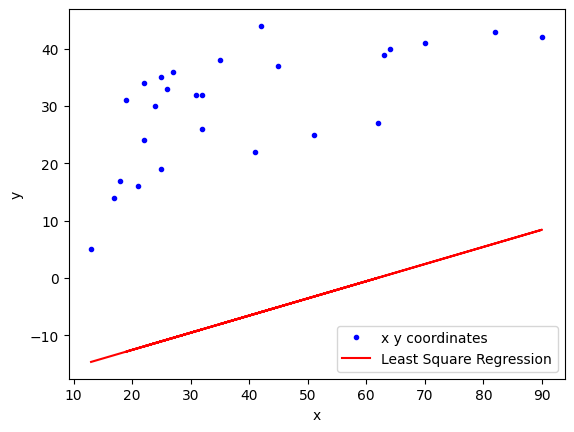

In [14]:
#Least Square Regression
import numpy as np
import matplotlib.pyplot as plt

xs = [13, 17, 18, 21, 22, 25, 31, 32, 41, 51, 62, 24, 19, 32, 26, 22, 25, 27, 45, 35, 63, 64, 70, 90, 82, 42]
ys = [5, 14, 17, 16, 24, 19, 32, 26, 22, 25, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

x = np.array(xs)
y = np.array(ys)

A = np.vstack((x, np.ones(len(x)))).T

y_new = y[:, np.newaxis]

pinv = np.linalg.pinv(A)
beta = np.dot(pinv, y_new)

f = beta[0]*x - beta[1]

plt.plot(x,y,".b")
plt.plot(x,f,"-r")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["x y coordinates", "Least Square Regression"])

In [15]:
#Newton Raphson
import numpy as np

def f(x):
    return 5*x**3 - 3*x**2 + 12*x -1

def g(x):
    return 15*x**2 - 6*x + 12

def newton_raphson(x0, tolerate = 0.0083, iter = 15):
    for i in range(iter):
        x1 = x0 - f(x0)/g(x0)
        print(f'Iteration of {i+1}. new root = {x1}')
        if np.abs(f(x1)) < tolerate:
            print(f'the root of equation is: {x1}')
            return
        x0 = x1
    print("Maximum iterations reached. Root not found within the tolerate")

x_initial = 100
newton_raphson(x_initial, tolerate= 0.0083, iter = 15)

Iteration of 1. new root = 66.72824806575107
Iteration of 2. new root = 44.54453099305587
Iteration of 3. new root = 29.751554656962874
Iteration of 4. new root = 19.8838054875997
Iteration of 5. new root = 13.296620423028507
Iteration of 6. new root = 8.89205332717158
Iteration of 7. new root = 5.9358387892207904
Iteration of 8. new root = 3.9349391107013
Iteration of 9. new root = 2.555329897101462
Iteration of 10. new root = 1.5670727075188218
Iteration of 11. new root = 0.8144310658143958
Iteration of 12. new root = 0.2585853026742472
Iteration of 13. new root = 0.08490668430507048
the root of equation is: 0.08490668430507048


In [16]:
#Riemann Integral
import numpy as np

def f(x):
    return 4*x**2 + 5*x - 1

x1 = 3
x2 = 9
n = 50

lebar_kotak = (x2-x1) / (n-1)

x = np.linspace(x1,x2,n)
y = f(x)

left = lebar_kotak * sum(y[0:n-1])
right = lebar_kotak * sum(y[1:n])

print(f'Left : {left}')
print(f'Right : {right}')

x_mid = (x[0:n-1] + x[1:n]) / 2
y_mid = f(x_mid)
riemann = lebar_kotak * sum(y_mid)
print(f'Mid : {riemann}')

Left : 1090.5905872553105
Right : 1129.5293627655146
Mid : 1109.970012494794


In [17]:
#Trapezoidal Rule
import numpy as np

def f(x):
    return 4*x**2 + 5*x - 1

x1 = 3
x2 = 9
n = 50

lebar_kotak = (x2-x1) / (n-1)

x = np.linspace(x1,x2,n)
y = f(x)

trapezoid = (y[0] + 2*sum(y[1:n-1]) + y[n-1]) * lebar_kotak/2
print(trapezoid)

1110.0599750104125
